In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [3]:
nltk.download('stopwords')

#load the dataset
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
texts = newsgroups.data
labels = newsgroups.target
label_names = newsgroups.target_names

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/tmp/ipython-input-4-3313977087.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=label_df, y='Category', palette='viridis', order=label_df['Category'].value_counts().index)


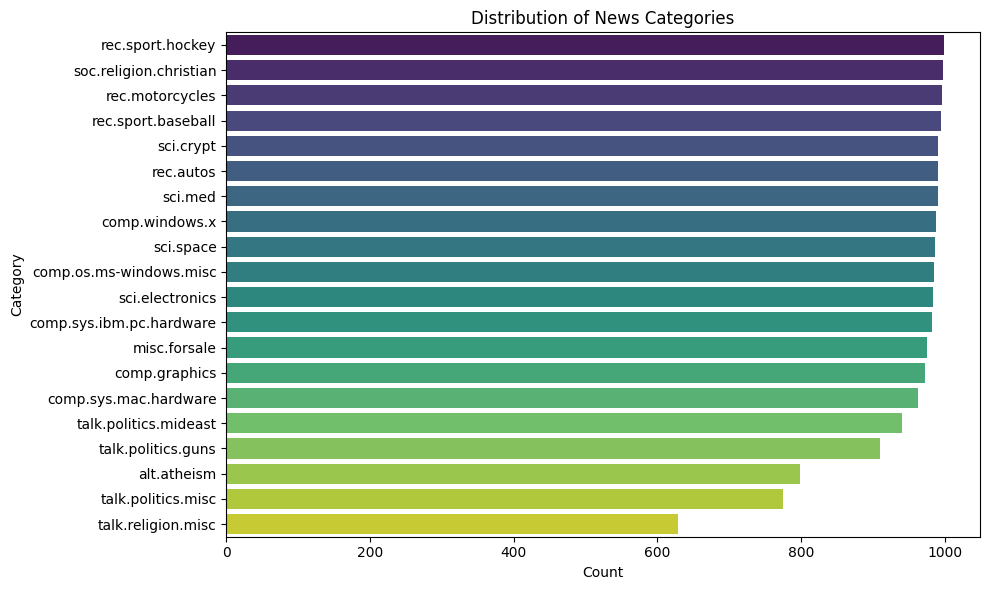

In [4]:
#visualize the class distributn
label_df = pd.DataFrame({'Category': [label_names[i] for i in labels]})
plt.figure(figsize=(10,6))
sns.countplot(data=label_df, y='Category', palette='viridis', order=label_df['Category'].value_counts().index)
plt.title('Distribution of News Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [5]:
#cleaning the text
def clean_text(text_list):
  stop_words = set(stopwords.words('english'))
  cleaned = []
  for text in text_list:
    text = re.sub(r'[^\w\s]', '', str(text))
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]
    cleaned.append(' '.join(words))
  return cleaned

cleaned_texts = clean_text(texts)

In [6]:
#TF-IDF feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(cleaned_texts)
y = labels

#Split data (Train: 80%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
#Logistic Regression
log_model = LogisticRegression(max_iter=1000, multi_class='ovr')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", round(acc_log, 2))

report_dict = classification_report(y_test, y_pred_log, target_names=label_names, output_dict=True)
report_df_lr = pd.DataFrame(report_dict).transpose()
report_df_classes = report_df.iloc[:-3, :]

Logistic Regression Accuracy: 0.86


In [12]:
#Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", round(acc_nb, 2))

report_dict_nb = classification_report(y_test, y_pred_nb, target_names=label_names, output_dict=True)
report_df_nb = pd.DataFrame(report_dict_nb).transpose()
report_df_classes_nb = report_df_nb.iloc[:-3, :]


Naive Bayes Accuracy: 0.84


In [13]:
#Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", round(acc_tree, 2))

report_dict_tree = classification_report(y_test, y_pred_tree, target_names=label_names, output_dict=True)
report_df_tree = pd.DataFrame(report_dict_tree).transpose()
report_df_classes_tree = report_df_tree.iloc[:-3, :]

Decision Tree Accuracy: 0.63


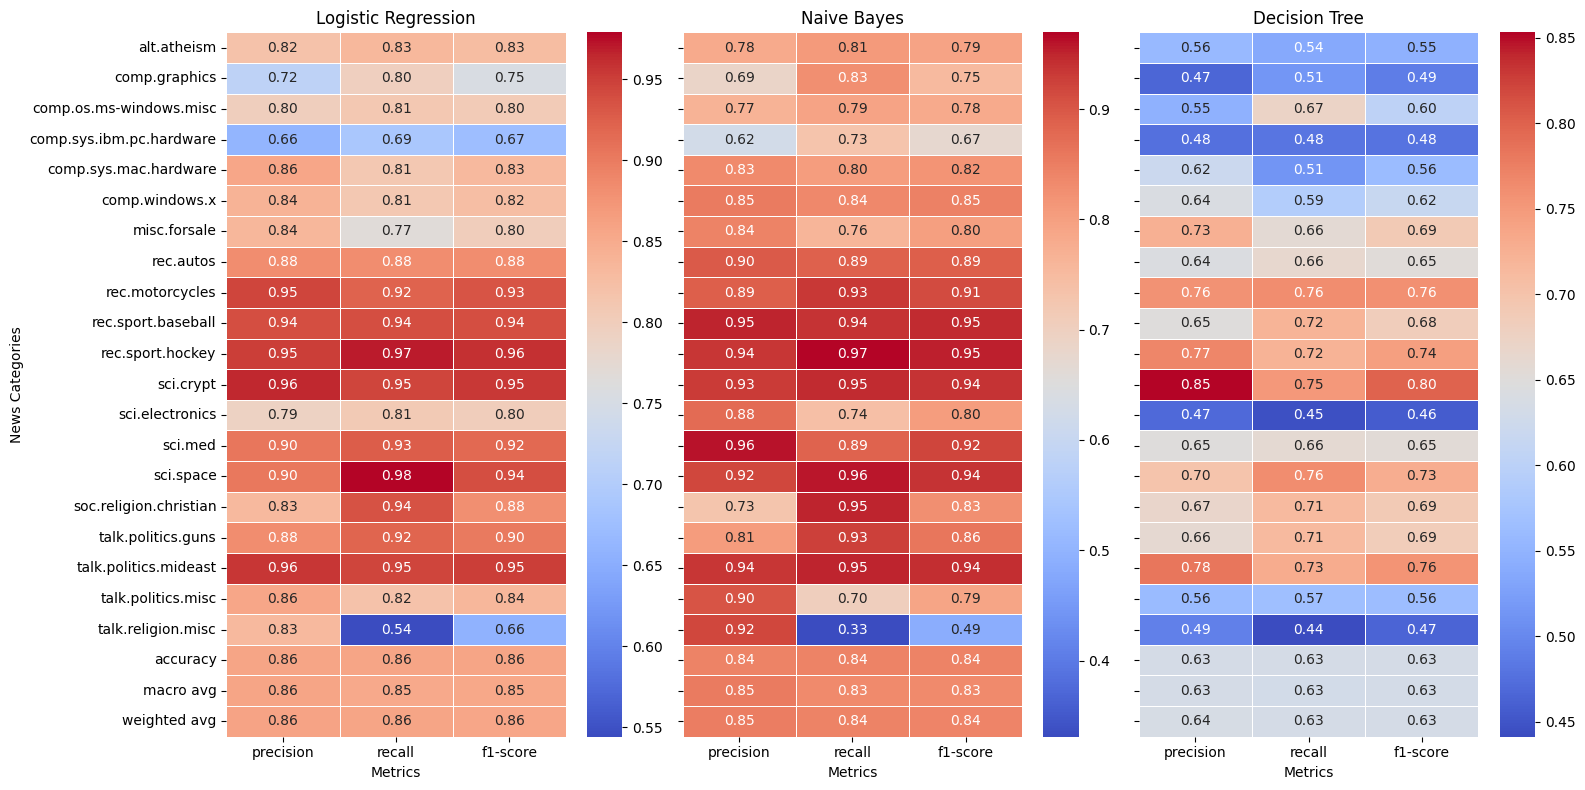

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8), sharey=True)

#Logistic Regression
sns.heatmap(report_df_lr[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('News Categories')

#Naive Bayes
sns.heatmap(report_df_nb[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, ax=axes[1])
axes[1].set_title('Naive Bayes')
axes[1].set_xlabel('Metrics')

#Decision Tree
sns.heatmap(report_df_tree[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, ax=axes[2])
axes[2].set_title('Decision Tree')
axes[2].set_xlabel('Metrics')

plt.tight_layout()
plt.show()

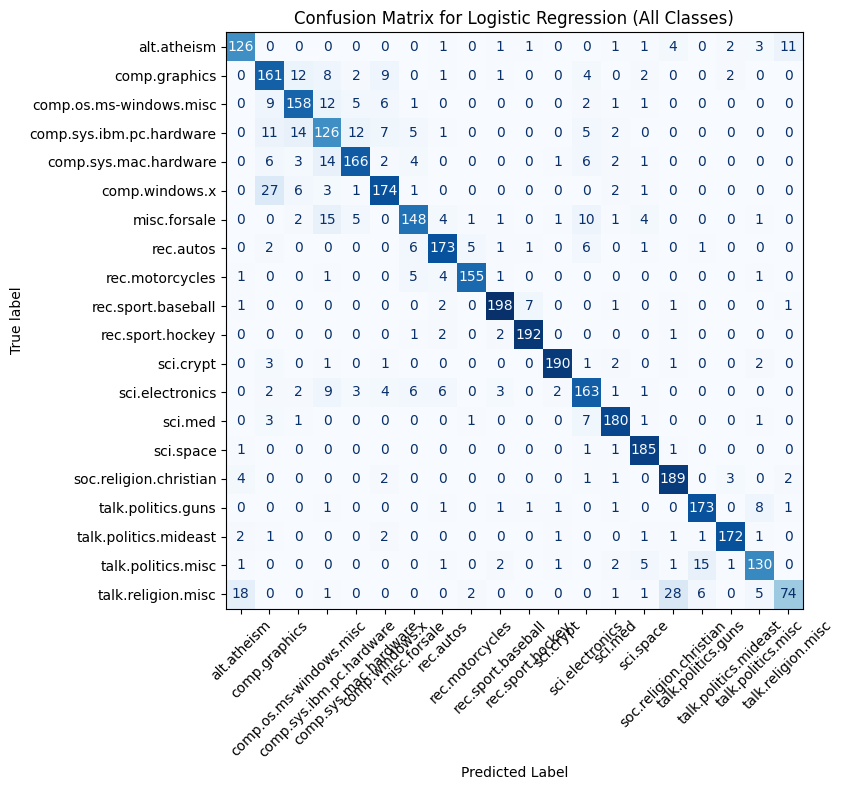

In [22]:
#Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_log)
fig, ax = plt.subplots(figsize=(12, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(cmap='Blues', xticks_rotation=45, ax=ax, colorbar=False)
plt.title('Confusion Matrix for Logistic Regression (All Classes)')
plt.xlabel('Predicted Label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [27]:
#Accuracy Summary
print("Logistic Regression Accuracy:", round(acc_log, 2))
print("Naive Bayes Accuracy:", round(acc_nb, 2))
print("Decision Tree Accuracy:", round(acc_tree, 2))

Logistic Regression Accuracy: 0.86
Naive Bayes Accuracy: 0.84
Decision Tree Accuracy: 0.63


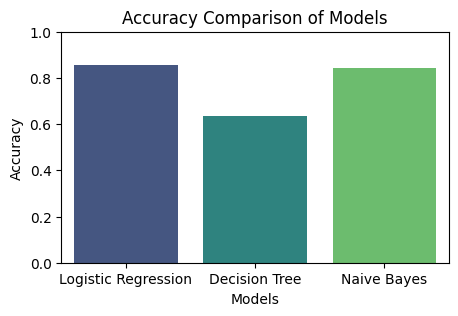

In [26]:
#Accuracy comparison
model_names = ['Logistic Regression', 'Decision Tree', 'Naive Bayes']
accuracies = [acc_log, acc_tree, acc_nb]

plt.figure(figsize=(5, 3))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Accuracy Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
